In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("chernobyl data.csv")


In [3]:
print(df.shape)
print(df.head())


(2051, 11)
  PAYS  Code  Ville      X     Y      Date End_of_sampling  Duration(h.min)  \
0   SE     1  RISOE  12.07  55.7  86/04/27        24:00:00             24.0   
1   SE     1  RISOE  12.07  55.7  86/04/28        24:00:00             24.0   
2   SE     1  RISOE  12.07  55.7  86/04/29           12:00             12.0   
3   SE     1  RISOE  12.07  55.7  86/04/29        24:00:00             12.0   
4   SE     1  RISOE  12.07  55.7  86/04/30        24:00:00             24.0   

  I_131_(Bq/m3) Cs_134_(Bq/m3) Cs_137_(Bq/m3)  
0             1              0           0.24  
1        0.0046        0.00054        0.00098  
2        0.0147         0.0043         0.0074  
3       0.00061              0        0.00009  
4       0.00075         0.0001        0.00028  


In [4]:
df.replace('?', np.nan, inplace=True)


In [5]:
df.isnull().sum()


PAYS                 0
Code                 0
Ville                0
X                    0
Y                    0
Date                 0
End_of_sampling      0
Duration(h.min)      0
I_131_(Bq/m3)       40
Cs_134_(Bq/m3)     220
Cs_137_(Bq/m3)     535
dtype: int64

In [6]:
df['I_131_(Bq/m3)'] = pd.to_numeric(df['I_131_(Bq/m3)'], errors='coerce')
df['I_131_(Bq/m3)'].fillna(df['I_131_(Bq/m3)'].mean(), inplace=True)

df['Cs_134_(Bq/m3)'] = pd.to_numeric(df['Cs_134_(Bq/m3)'], errors='coerce')
df['Cs_134_(Bq/m3)'].fillna(df['Cs_134_(Bq/m3)'].mean(), inplace=True)

df['Cs_137_(Bq/m3)'] = pd.to_numeric(df['Cs_137_(Bq/m3)'], errors='coerce')
df['Cs_137_(Bq/m3)'].fillna(df['Cs_137_(Bq/m3)'].mean(), inplace=True)



In [7]:
df.isnull().sum()

PAYS               0
Code               0
Ville              0
X                  0
Y                  0
Date               0
End_of_sampling    0
Duration(h.min)    0
I_131_(Bq/m3)      0
Cs_134_(Bq/m3)     0
Cs_137_(Bq/m3)     0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)



In [9]:
def convert_to_minutes(time_str):
    if isinstance(time_str, str):
        time_parts = time_str.split(':')
        hours, minutes = time_parts[:2]
        return int(hours) * 60 + int(minutes)
    return time_str

df['End_of_sampling'] = df['End_of_sampling'].apply(convert_to_minutes)
df['Duration(h.min)'] = df['Duration(h.min)'].apply(convert_to_minutes)



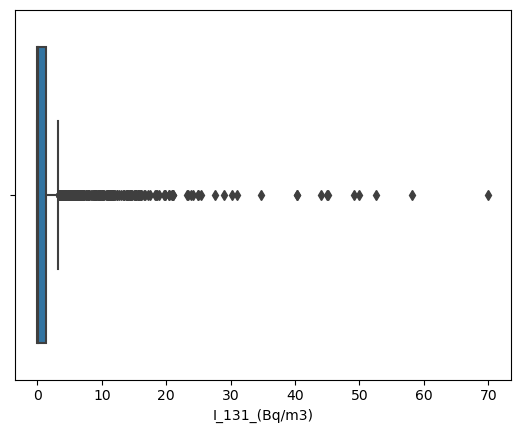

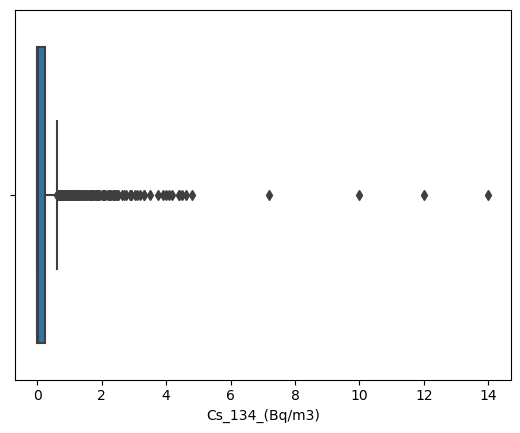

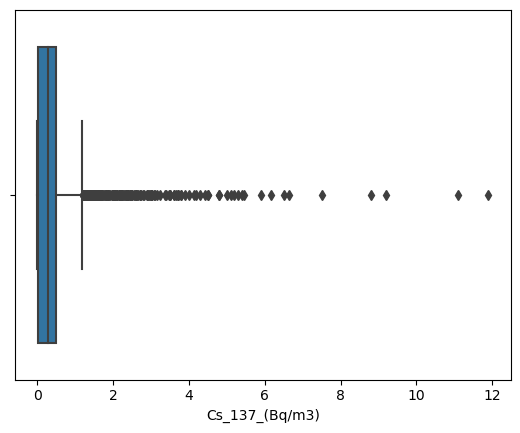

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df, x='I_131_(Bq/m3)')
plt.show()

sns.boxplot(data=df, x='Cs_134_(Bq/m3)')
plt.show()

sns.boxplot(data=df, x='Cs_137_(Bq/m3)')
plt.show()


In [11]:
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

df['I_131_(Bq/m3)'] = remove_outliers_iqr(df['I_131_(Bq/m3)'])
df['Cs_134_(Bq/m3)'] = remove_outliers_iqr(df['Cs_134_(Bq/m3)'])
df['Cs_137_(Bq/m3)'] = remove_outliers_iqr(df['Cs_137_(Bq/m3)'])


In [12]:
print(df.duplicated().sum())


0


In [13]:
df.drop_duplicates(inplace=True)


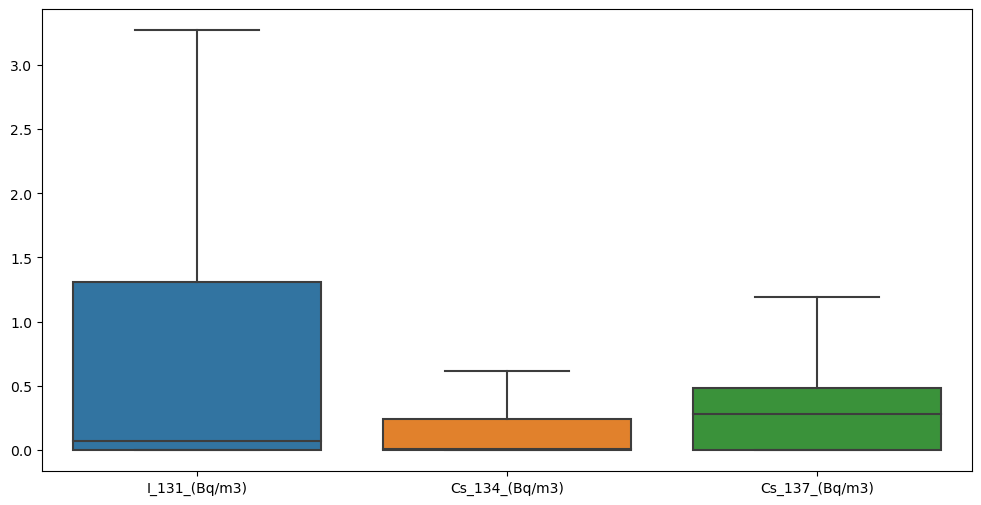

In [14]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']])
plt.show()


In [15]:
print(df.shape)
print(df.head())


(2051, 11)
  PAYS  Code  Ville      X     Y       Date  End_of_sampling  Duration(h.min)  \
0   SE     1  RISOE  12.07  55.7 1986-04-27             1440             24.0   
1   SE     1  RISOE  12.07  55.7 1986-04-28             1440             24.0   
2   SE     1  RISOE  12.07  55.7 1986-04-29              720             12.0   
3   SE     1  RISOE  12.07  55.7 1986-04-29             1440             12.0   
4   SE     1  RISOE  12.07  55.7 1986-04-30             1440             24.0   

   I_131_(Bq/m3)  Cs_134_(Bq/m3)  Cs_137_(Bq/m3)  
0        1.00000         0.00000         0.24000  
1        0.00460         0.00054         0.00098  
2        0.01470         0.00430         0.00740  
3        0.00061         0.00000         0.00009  
4        0.00075         0.00010         0.00028  


In [16]:
# Check for irregularities in numeric columns
numeric_columns = ['X', 'Y', 'End_of_sampling', 'Duration(h.min)', 'I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']

for col in numeric_columns:
    print(f"Min value in {col}: {df[col].min()}")
    print(f"Max value in {col}: {df[col].max()}")
    print()


Min value in X: -6.28
Max value in X: 50.68

Min value in Y: 0.0
Max value in Y: 63.83

Min value in End_of_sampling: 0
Max value in End_of_sampling: 1440

Min value in Duration(h.min): 0.2
Max value in Duration(h.min): 700.0

Min value in I_131_(Bq/m3): 0.0
Max value in I_131_(Bq/m3): 3.2696

Min value in Cs_134_(Bq/m3): 0.0
Max value in Cs_134_(Bq/m3): 0.6153256482509717

Min value in Cs_137_(Bq/m3): 0.0
Max value in Cs_137_(Bq/m3): 1.1954545371845948



In [17]:
df.dtypes

PAYS                       object
Code                        int64
Ville                      object
X                         float64
Y                         float64
Date               datetime64[ns]
End_of_sampling             int64
Duration(h.min)           float64
I_131_(Bq/m3)             float64
Cs_134_(Bq/m3)            float64
Cs_137_(Bq/m3)            float64
dtype: object

In [18]:
analysis_df = df


In [19]:
def assign_pollution_level(concentration):
    threshold_low = 1
    threshold_medium = 2
    if concentration < threshold_low:
        return 'low'
    elif concentration < threshold_medium:
        return 'medium'
    else:
        return 'high'
def assign_pollution_level_cs134(concentration):
    threshold_low = 0.2
    threshold_medium = 0.4
    if concentration < threshold_low:
        return 'low'
    elif concentration < threshold_medium:
        return 'medium'
    else:
        return 'high'

def assign_pollution_level_cs137(concentration):
    threshold_low = 0.4
    threshold_medium = 0.8
    if concentration < threshold_low:
        return 'low'
    elif concentration < threshold_medium:
        return 'medium'
    else:
        return 'high'
    

analysis_df['Cs_134_level'] = analysis_df['Cs_134_(Bq/m3)'].apply(assign_pollution_level_cs134)
analysis_df['Cs_137_level'] = analysis_df['Cs_137_(Bq/m3)'].apply(assign_pollution_level_cs137)
analysis_df['I_131_level'] = analysis_df['I_131_(Bq/m3)'].apply(assign_pollution_level)


In [20]:
analysis_df.head

<bound method NDFrame.head of      PAYS  Code     Ville      X     Y       Date  End_of_sampling  \
0      SE     1     RISOE  12.07  55.7 1986-04-27             1440   
1      SE     1     RISOE  12.07  55.7 1986-04-28             1440   
2      SE     1     RISOE  12.07  55.7 1986-04-29              720   
3      SE     1     RISOE  12.07  55.7 1986-04-29             1440   
4      SE     1     RISOE  12.07  55.7 1986-04-30             1440   
...   ...   ...       ...    ...   ...        ...              ...   
2046   HU    24  BUDAPEST  19.10  47.5 1986-05-07              480   
2047   HU    24  BUDAPEST  19.10  47.5 1986-05-08              480   
2048   HU    24  BUDAPEST  19.10  47.5 1986-05-09              480   
2049   HU    24  BUDAPEST  19.10  47.5 1986-05-10              480   
2050   HU    24  BUDAPEST  19.10  47.5 1986-05-11              480   

      Duration(h.min)  I_131_(Bq/m3)  Cs_134_(Bq/m3)  Cs_137_(Bq/m3)  \
0                24.0        1.00000         0.00000     

In [21]:
# Save the cleaned dataset
analysis_df.to_csv("Chernobyl_Dataset.csv", index=False)
